In [14]:
# Linear regression is used for modelling quantitative dependency by examining if there is any dependency 
# between a giver response variable (Y) and predictor/explanatory variables (X), it helps answer the question:
# "if and how a change in X influences a change in Y", modeling changes in Y=f(X)
#                                                       _        _
# an example of a simple linear regression equation is: Y = a + bX --> y(i) = a + bx(i) + e(i) where y(i) is the response
# variable. The ith data point (out of n), a is the intercept (the value of y when x = 0), b is the slope of the regression
# (the change in y for every unit of x), e(i) is the difference between each data point and its predicted value ("error term" or
# "residual")


%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model



In [15]:
# load the data into a pandas dataframe
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
x = iris[["petal_length"]] # predictor
y = iris[["petal_width"]] # response

# Linear regression
# Note the swap of x and y
model = sm.OLS(y, x)
results = model.fit()
#Statsmodels gives R-like statistical output
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            petal_width   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              4417.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):                   1.22e-112
Time:                        18:30:52   Log-Likelihood:                         -8.7179
No. Observations:                 150   AIC:                                      19.44
Df Residuals:                     149   BIC:                                      22.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [18]:
# Where is the intercept info?
x = iris["petal_length"]
x = np.vander(x, 2) # add a constant row for the intercept
y = iris["petal_width"]

model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           4.68e-86
Time:                        18:32:42   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4158      0.010     43.387      0.0

In [20]:
# petal_width = 0.41-0.36* (petal_length)
x = iris[["petal_length", "sepal_length"]] # predicators
y = iris["petal_width"]

# Multiple Linear Regression
# Note the swap of x and y
x = iris[["petal_length", "sepal_length"]]
x = sm.add_constant(x) # another way to add a constant row for an intercept
y = iris["petal_width"]

model = sm.OLS(y,x)
results = model.fit()
print(results.summary())
model = sm.OLS(y,x)
results = model.fit()
#Statsmodels gives R-like statistical output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     962.1
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           3.60e-85
Time:                        18:37:01   Log-Likelihood:                 26.792
No. Observations:                 150   AIC:                            -47.58
Df Residuals:                     147   BIC:                            -38.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0090      0.182     -0.049   

In [21]:
# use categorical variables
dummies = pd.get_dummies(iris["species"])
# Add to the original dataframe
iris = pd.concat([iris, dummies], axis = 1) # assign numerical values to the different species
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [22]:
x = iris[["petal_length", "sepal_length", "setosa", "versicolor", "virginica"]]
x = sm.add_constant(x) # another way to add a constant row for an intercept
y = iris["petal_width"]

model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     629.8
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           1.54e-90
Time:                        18:39:30   Log-Likelihood:                 46.705
No. Observations:                 150   AIC:                            -83.41
Df Residuals:                     145   BIC:                            -68.36
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2533      0.127      1.993   

In [23]:
# you would be inclined to choose the model that had the lower AIC or BIC value
# Fit the linear model using sklearn
# from sklearn import Linear_model
model = linear_model.LinearRegression()
results = model.fit(x,y)

#Print the coefficients
print(results.intercept_, results.coef_)

0.3376683161818006 [ 0.          0.23192122 -0.00169337 -0.42226013  0.01039913  0.411861  ]


In [24]:
# Checking conditions of Linear Regression

# load the data into a pandas dataframe

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


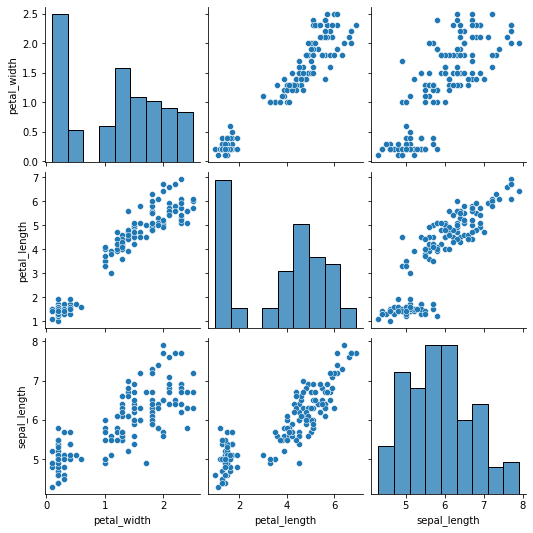

In [25]:
# linear relationship between y and Xs
sns.pairplot(iris[['petal_width', 'petal_length', 'sepal_length']].dropna(how = 'any', axis = 0))

In [26]:
# Multiple Linear Regression
# Note the swap of x and y
x = iris[["petal_length", "sepal_length"]]
x = sm.add_constant(x) # another way to add a constant row for an intercept
y = iris["petal_width"]

model = sm.OLS(y,x)
results = model.fit()
print(results.summary())
model = sm.OLS(y,x)
results = model.fit()
#Statsmodels gives R-like statistical output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     962.1
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           3.60e-85
Time:                        18:46:48   Log-Likelihood:                 26.792
No. Observations:                 150   AIC:                            -47.58
Df Residuals:                     147   BIC:                            -38.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0090      0.182     -0.049   

In [27]:
# Are the residuals normally distributed?

#JB test: test for normal distribution of residuals
## H0: The null hypothesis for the test is that the data is normally distributed ( in this case residuals )

# Unfortunately, with small samples the Jarque-Bera test is prone rejecting the null-hypothesis-
# that the distribution is normal-when it is in fact true

res = results.resid

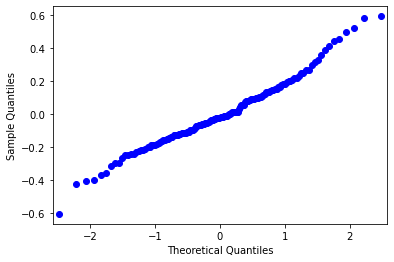

In [28]:
sm.qqplot(res)
plt.show()

In [29]:
# Dubrin-watson: used for measuring autocorrelation
# aproximately equal to 2(1-r), where r is the sample autocorrelation

# ranges from zero to four, and a value around two suggests that there is no autocorrelation.
# values greater than two suggest negative correlation, and values less than one suggest positive correlation.

# Multicollinearity

#condition no.: used for measuring multi-collinearity
# cond no>30 means multi-collinearity
# influences the stability & reliability of coefficients

corr = x.corr() # correlation between predictors
print(corr)

              const  petal_length  sepal_length
const           NaN           NaN           NaN
petal_length    NaN      1.000000      0.871754
sepal_length    NaN      0.871754      1.000000


In [30]:
# heteroscedasticity

# test whether the variance of the errors from a regression is dependent on the values of the independent variables
# there should be relation or pattern between residuals and fitted values, i.e. we want homoscedasticity

# breusch-pagan test

# h0: null hypothesis of the Breusch-Pagan test is homoscedasticity ( = variance does not depend on auxiliary regressors)

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['Lagrance multiplier statistic', 'p_value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name,test)

[('Lagrance multiplier statistic', 23.53447941749092),
 ('p_value', 7.754480840216262e-06),
 ('f-value', 13.677911807250505),
 ('f p-value', 3.566518343360443e-06)]

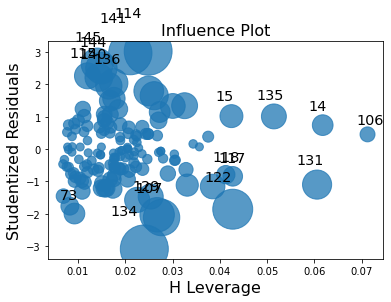

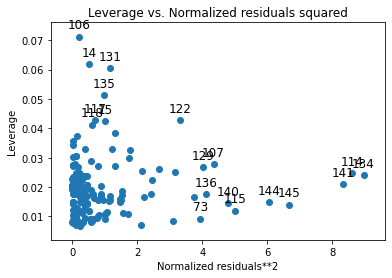

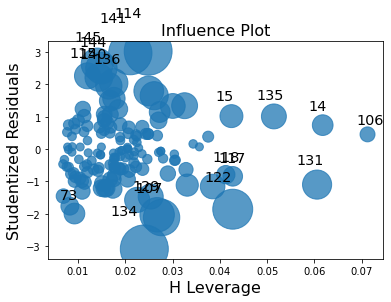

In [31]:
# reject the null hypothesis that the variance of the residuals is constant and infer that heteroscedasticity is indeed present

# Influence Test

# plot helps us to find influential cases (i.e., subjects) if any. Not all outliers are influential in linear regression analysis
# outlying values at the upper right corner or at the lower right corner

from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(results)
influence_plot(results)

In [32]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


0.759954645772515
0.7773925209408674
0.7829741899795442
0.7988703254837917
0.7988831948262809


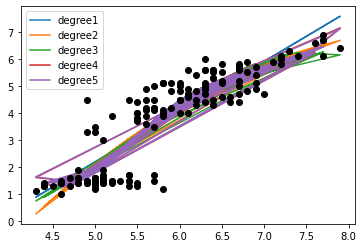

In [34]:
x = iris.sepal_length
y = iris.petal_length
from sklearn import linear_model
lr = linear_model.LinearRegression()
from sklearn.metrics import r2_score
for deg in [1,2,3,4,5]:
    lr.fit(np.vander(x,deg+1),y);
    y_lr=lr.predict(np.vander(x,deg+1))
    plt.plot(x,y_lr,label='degree' + str(deg));
    plt.legend(loc=2);
    print(r2_score(y,y_lr))
    
plt.plot(x,y,'ok')

In [35]:
# Generalised Linear Models

# User in the situations when the residuals are neither normally distributed nor could be made normal
# Data such as biological data where residuals are not typically normal:
# Examples: Proportions: (ex: infection rates, survival rates)
            # Count Data: (ex: insects on a leaf, trees in a plot) - often many zeroes - variance will increase with mean
            # Binary response (ex: dead/alive, present/absent)
# they are used for understanding what external influences (proxy being independent variables) drive change in the response
#variable

#How GLMS work:
#    - it generalizes the linear regression by allowing the linear model to be related to the response variable(Y) via a link
#    function
##   - non-normal error structures can be included
#    - residual distributions / error structure of the variable Y from the exponential family can be considered within the GLM
#    framework(ex: normal, Poisson, binomial, gamma)
#    - Link function - g() is used which is a transformation of Y used to linearize its values
#   n(i) = g(i)
#    - the linear predictor of predictor variables X(j), to regress against the transformed response
#    n = a + b(1)x(1) + b(2)x(2) + ...

In [36]:
# Logistic Regression
df = pd.read_csv("traint.csv") #titanic

In [37]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.shape

(892, 12)

In [39]:
df.isnull().sum() #number of NAs in a column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            178
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          688
Embarked         2
dtype: int64

In [40]:
df = df[["Survived", "Pclass", "Age", "Fare"]]
df = df.dropna() #drop NAs - empty values

In [41]:
df.head(7)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
6,0,1,54.0,51.8625
7,0,3,2.0,21.0750


Text(0.5, 1.0, 'Survival Breakdown (1 = Survived, 0 = Died)')

<Figure size 432x288 with 0 Axes>

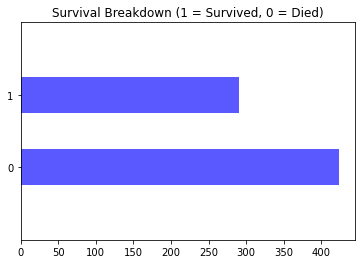

In [43]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts()))
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

E:\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


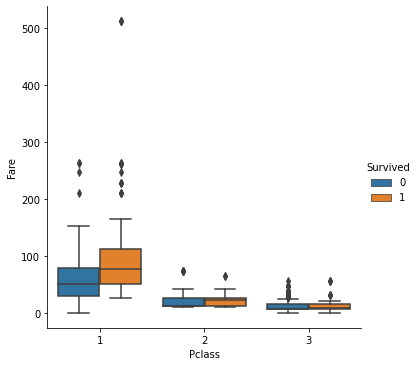

In [44]:
sns.catplot(x="Pclass", y="Fare", hue="Survived", data=df, kind = "box")

In [45]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + Fare' # c indicates categorical
y = df[['Survived']]
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [46]:
x=df[["Pclass", "Age", "Fare"]]
print(type(x))
# Make the model
logit = sm.Logit(y, x.astype(float)) # import statsmodels.api as sm

#Fit the model
result = logit.fit()
print(result.summary())

<class 'pandas.core.frame.DataFrame'>
Optimization terminated successfully.
         Current function value: 0.608663
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:                            2
Date:                Sun, 13 Dec 2020   Pseudo R-squ.:                 0.09885
Time:                        02:02:07   Log-Likelihood:                -434.59
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.978e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.2803      0.054     -5.146      0.000      -0.387    

In [47]:
# Log [p/(1-p)] = -.28*Pclass + .0146 * faree - 0.01*Age
# has a 1 unit increase or decrease in a variable affects the odds of surviving
# Number of successes: 1 failure
# odds
print(np.exp(results.params))

const           0.991044
petal_length    1.567334
sepal_length    0.921071
dtype: float64


In [48]:
# odds that passengers die increase by a factor of 0.98 for each unit change in age
# prob = odds/(1+odds)
# probability of finding someone dead on basis of age = 0.98/(1+0.98)
from patsy import dmatrices
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm

df2 = pd.read_csv("traint.csv")
df2.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [49]:
df2 = df2[["Survived", "Pclass", "Sex", "Age", "Fare"]]
df2.head(6)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583


In [50]:
y, x= dmatrices('Survived ~ C(Pclass) + C(Sex) + Age + Fare', df2, return_type = 'dataframe')
# c indicates categorical

# sklearn output
model = LogisticRegression(fit_intercept = False, C = 1e9)
mdl = model.fit(x,y)
model.coef_

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[ 3.72258937e+00, -1.27653305e+00, -2.54151165e+00,
        -2.51842076e+00, -3.67337595e-02,  5.22545919e-04]])

In [51]:
logit = sm.Logit(y, x)
logit.fit().params

Optimization terminated successfully.
         Current function value: 0.453242
         Iterations 6


Intercept         3.722505
C(Pclass)[T.2]   -1.276590
C(Pclass)[T.3]   -2.541576
C(Sex)[T.male]   -2.518505
Age              -0.036730
Fare              0.000523
dtype: float64

In [52]:
# Fit the model
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.453242
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Sun, 13 Dec 2020   Pseudo R-squ.:                  0.3290
Time:                        02:07:50   Log-Likelihood:                -323.61
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.919e-66
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7225      0.465      8.014      0.000       2.812       4.633
C(Pclass)[T.2]   